In [1]:
#Carga de datos
import pandas as pd
data_1 = pd.read_excel('datasoccer.xlsx', encoding= "ISO-8859-1", sep=",")
data_1.head()

,Name,Age,Overall,Potential,Acceleration,Aggression,Agility,Balance,Ball control,Composure,...,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
0,Cristiano Ronaldo,32.0,94.0,94.0,89,63,89,63,93,95,...,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,92.0
1,L. Messi,30.0,93.0,93.0,92,48,90,95,95,96,...,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,88.0
2,Neymar,25.0,92.0,94.0,94,56,96,82,95,92,...,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,84.0
3,L. Suárez,30.0,92.0,92.0,88,78,86,60,91,83,...,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,88.0
4,M. Neuer,31.0,92.0,92.0,58,29,52,35,48,70,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
data_1.shape
data = data_1

In [7]:
def verificator_null():
    if data.isnull().any().any():
        print(pd.concat(
            [data.isnull().any(), 
             data.isnull().sum(),
             data.dtypes], 
            axis=1))
    else:
        print("DATA LIMPIA DE NULOS")
verificator_null()

                         0     1        2
Name                  True     1   object
Age                   True     1  float64
Overall               True     1  float64
Potential             True     1  float64
Acceleration         False     0   object
Aggression            True     1   object
Agility               True     1   object
Balance               True     1   object
Ball control          True     1   object
Composure             True     1   object
Crossing              True     1   object
Curve                 True     1   object
Dribbling             True     1   object
Finishing             True     1   object
Free kick accuracy    True     1   object
GK diving             True     1   object
GK handling           True     1   object
GK kicking            True     1   object
GK positioning        True     1   object
GK reflexes           True     1   object
Heading accuracy      True     1   object
Interceptions         True     1   object
Jumping               True     1  

In [14]:
def columns_null():
    return [
        col for col in data.columns if data[col].isnull().any()
    ]   

def colums_null_for_types():
    return {
        str(k).lower(): [col for col in list(v) if col in columns_null()]
        for k, v in 
        data.columns.to_series().groupby(data.dtypes).groups.items()
    }
dicc_nulls = colums_null_for_types()
dicc_nulls

{'float64': ['Age',
  'Overall',
  'Potential',
  'CAM',
  'CB',
  'CDM',
  'CF',
  'CM',
  'LAM',
  'LB',
  'LCB',
  'LCM',
  'LDM',
  'LF',
  'LM',
  'LS',
  'LW',
  'LWB',
  'RAM',
  'RB',
  'RCB',
  'RCM',
  'RDM',
  'RF',
  'RM',
  'RS',
  'RW',
  'RWB',
  'ST'],
 'object': ['Name',
  'Aggression',
  'Agility',
  'Balance',
  'Ball control',
  'Composure',
  'Crossing',
  'Curve',
  'Dribbling',
  'Finishing',
  'Free kick accuracy',
  'GK diving',
  'GK handling',
  'GK kicking',
  'GK positioning',
  'GK reflexes',
  'Heading accuracy',
  'Interceptions',
  'Jumping',
  'Long passing',
  'Long shots',
  'Marking',
  'Penalties',
  'Positioning',
  'Reactions',
  'Short passing',
  'Shot power',
  'Sliding tackle',
  'Sprint speed',
  'Stamina',
  'Standing tackle',
  'Strength',
  'Vision',
  'Volleys',
  'Preferred Positions']}

In [18]:
for tipo, list_col in dicc_nulls.items():
    if tipo == 'float64':
        for col in list_col:
            data[col].fillna(0, inplace=True)
    if tipo == 'object':
        for col in list_col:
            data[col].fillna('0', inplace=True)

In [19]:
verificator_null()

DATA LIMPIA DE NULOS


In [20]:
data.head(100)

,Name,Age,Overall,Potential,Acceleration,Aggression,Agility,Balance,Ball control,Composure,...,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
0,Cristiano Ronaldo,32.0,94.0,94.0,89,63,89,63,93,95,...,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,92.0
1,L. Messi,30.0,93.0,93.0,92,48,90,95,95,96,...,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,88.0
2,Neymar,25.0,92.0,94.0,94,56,96,82,95,92,...,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,84.0
3,L. Suárez,30.0,92.0,92.0,88,78,86,60,91,83,...,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,88.0
4,M. Neuer,31.0,92.0,92.0,58,29,52,35,48,70,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,R. Lewandowski,28.0,91.0,91.0,79,80,78,80,89,87,...,58.0,57.0,78.0,62.0,87.0,82.0,88.0,84.0,61.0,88.0
6,De Gea,26.0,90.0,92.0,57,38,60,43,42,64,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,E. Hazard,26.0,90.0,91.0,93,54,93,91,92,87,...,59.0,47.0,81.0,61.0,87.0,87.0,82.0,88.0,64.0,82.0
8,T. Kroos,27.0,90.0,90.0,60,60,71,69,89,85,...,76.0,72.0,87.0,82.0,81.0,81.0,77.0,80.0,78.0,77.0
9,G. Higuaín,29.0,90.0,90.0,78,50,75,69,85,86,...,51.0,46.0,71.0,52.0,84.0,79.0,87.0,82.0,55.0,87.0


In [25]:
#df = df.drop('column_name', 1)
data = data.drop('Preferred Positions', 1)
data.shape

(17982, 64)

In [21]:
data.columns

Index(['Name', 'Age', 'Overall', 'Potential', 'Acceleration', 'Aggression',
       'Agility', 'Balance', 'Ball control', 'Composure', 'Crossing', 'Curve',
       'Dribbling', 'Finishing', 'Free kick accuracy', 'GK diving',
       'GK handling', 'GK kicking', 'GK positioning', 'GK reflexes',
       'Heading accuracy', 'Interceptions', 'Jumping', 'Long passing',
       'Long shots', 'Marking', 'Penalties', 'Positioning', 'Reactions',
       'Short passing', 'Shot power', 'Sliding tackle', 'Sprint speed',
       'Stamina', 'Standing tackle', 'Strength', 'Vision', 'Volleys', 'CAM',
       'CB', 'CDM', 'CF', 'CM', 'LAM', 'LB', 'LCB', 'LCM', 'LDM', 'LF', 'LM',
       'LS', 'LW', 'LWB', 'Preferred Positions', 'RAM', 'RB', 'RCB', 'RCM',
       'RDM', 'RF', 'RM', 'RS', 'RW', 'RWB', 'ST'],
      dtype='object')

In [29]:
def replace_operation(val):
    val = str(val).split('.')[0]
    if val.isdigit():
        return int(val)
    elif '-' in val:
        ll = val.split('-')
        return int(ll[0].strip()) - int(ll[1].strip())
    elif '+' in val:
        ll = val.split('+')
        return int(ll[0].strip()) + int(ll[1].strip())
    
for col in data.columns:
    if col.lower() != 'name':
        data[col] = data[col].apply(replace_operation)

In [30]:
data.head(20)

,Name,Age,Overall,Potential,Acceleration,Aggression,Agility,Balance,Ball control,Composure,...,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
0,Cristiano Ronaldo,32,94,94,89,63,89,63,93,95,...,61,53,82,62,91,89,92,91,66,92
1,L. Messi,30,93,93,92,48,90,95,95,96,...,57,45,84,59,92,90,88,91,62,88
2,Neymar,25,92,94,94,56,96,82,95,92,...,59,46,79,59,88,87,84,89,64,84
3,L. Suárez,30,92,92,88,78,86,60,91,83,...,64,58,80,65,88,85,88,87,68,88
4,M. Neuer,31,92,92,58,29,52,35,48,70,...,0,0,0,0,0,0,0,0,0,0
5,R. Lewandowski,28,91,91,79,80,78,80,89,87,...,58,57,78,62,87,82,88,84,61,88
6,De Gea,26,90,92,57,38,60,43,42,64,...,0,0,0,0,0,0,0,0,0,0
7,E. Hazard,26,90,91,93,54,93,91,92,87,...,59,47,81,61,87,87,82,88,64,82
8,T. Kroos,27,90,90,60,60,71,69,89,85,...,76,72,87,82,81,81,77,80,78,77
9,G. Higuaín,29,90,90,78,50,75,69,85,86,...,51,46,71,52,84,79,87,82,55,87


In [31]:
data.to_csv("datasoccer_clean.csv", index=False)

In [33]:
data.shape[0]

17982

In [34]:
data.index


RangeIndex(start=0, stop=17982, step=1)

In [38]:
data['order'] = data.index + 1

In [39]:
data['order']

0            1
1            2
2            3
3            4
4            5
5            6
6            7
7            8
8            9
9           10
10          11
11          12
12          13
13          14
14          15
15          16
16          17
17          18
18          19
19          20
20          21
21          22
22          23
23          24
24          25
25          26
26          27
27          28
28          29
29          30
         ...  
17952    17953
17953    17954
17954    17955
17955    17956
17956    17957
17957    17958
17958    17959
17959    17960
17960    17961
17961    17962
17962    17963
17963    17964
17964    17965
17965    17966
17966    17967
17967    17968
17968    17969
17969    17970
17970    17971
17971    17972
17972    17973
17973    17974
17974    17975
17975    17976
17976    17977
17977    17978
17978    17979
17979    17980
17980    17981
17981    17982
Name: order, Length: 17982, dtype: int64

In [40]:
data.to_csv("datasoccer_clean.csv", index=False)

In [41]:
data.head(20)

,Name,Age,Overall,Potential,Acceleration,Aggression,Agility,Balance,Ball control,Composure,...,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST,order
0,Cristiano Ronaldo,32,94,94,89,63,89,63,93,95,...,53,82,62,91,89,92,91,66,92,1
1,L. Messi,30,93,93,92,48,90,95,95,96,...,45,84,59,92,90,88,91,62,88,2
2,Neymar,25,92,94,94,56,96,82,95,92,...,46,79,59,88,87,84,89,64,84,3
3,L. Suárez,30,92,92,88,78,86,60,91,83,...,58,80,65,88,85,88,87,68,88,4
4,M. Neuer,31,92,92,58,29,52,35,48,70,...,0,0,0,0,0,0,0,0,0,5
5,R. Lewandowski,28,91,91,79,80,78,80,89,87,...,57,78,62,87,82,88,84,61,88,6
6,De Gea,26,90,92,57,38,60,43,42,64,...,0,0,0,0,0,0,0,0,0,7
7,E. Hazard,26,90,91,93,54,93,91,92,87,...,47,81,61,87,87,82,88,64,82,8
8,T. Kroos,27,90,90,60,60,71,69,89,85,...,72,87,82,81,81,77,80,78,77,9
9,G. Higuaín,29,90,90,78,50,75,69,85,86,...,46,71,52,84,79,87,82,55,87,10


In [47]:
%matplotlib inline
data.columns

Index(['Name', 'Age', 'Overall', 'Potential', 'Acceleration', 'Aggression',
       'Agility', 'Balance', 'Ball control', 'Composure', 'Crossing', 'Curve',
       'Dribbling', 'Finishing', 'Free kick accuracy', 'GK diving',
       'GK handling', 'GK kicking', 'GK positioning', 'GK reflexes',
       'Heading accuracy', 'Interceptions', 'Jumping', 'Long passing',
       'Long shots', 'Marking', 'Penalties', 'Positioning', 'Reactions',
       'Short passing', 'Shot power', 'Sliding tackle', 'Sprint speed',
       'Stamina', 'Standing tackle', 'Strength', 'Vision', 'Volleys', 'CAM',
       'CB', 'CDM', 'CF', 'CM', 'LAM', 'LB', 'LCB', 'LCM', 'LDM', 'LF', 'LM',
       'LS', 'LW', 'LWB', 'RAM', 'RB', 'RCB', 'RCM', 'RDM', 'RF', 'RM', 'RS',
       'RW', 'RWB', 'ST', 'order'],
      dtype='object')

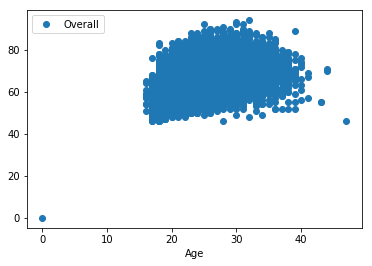

In [48]:
data.plot(x='Age', y='Overall', style='o')

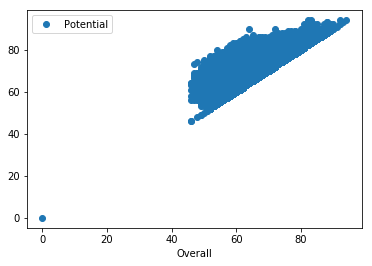

In [56]:
data.plot(x='Overall', y='Potential', style='o')

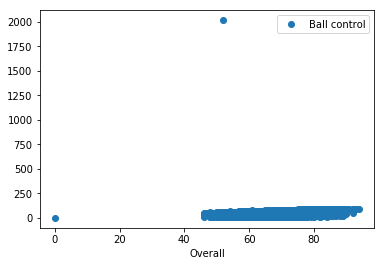

In [57]:
data.plot(x='Overall', y='Ball control', style='o')

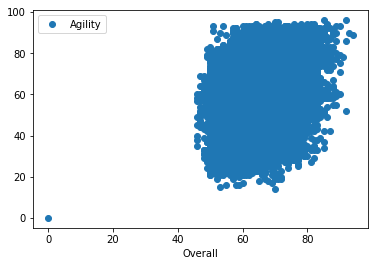

In [58]:
data.plot(x='Overall', y='Agility', style='o')

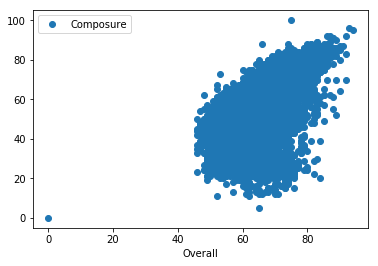

In [59]:
data.plot(x='Overall', y='Composure', style='o')

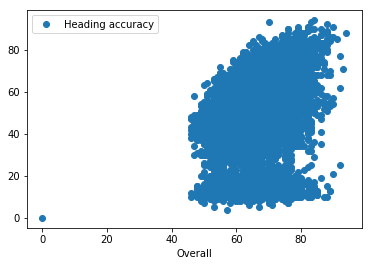

In [60]:

data.plot(x='Overall', y='Heading accuracy', style='o')

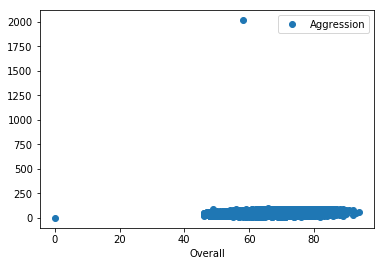

In [62]:
data.plot(x='Overall', y='Aggression', style='o')

In [61]:
data.describe(include="all")

,Name,Age,Overall,Potential,Acceleration,Aggression,Agility,Balance,Ball control,Composure,...,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST,order
count,17982,17982.000000,17982.000000,17982.000000,17982.000000,17982.000000,17982.000000,17982.000000,17982.000000,17982.000000,...,17982.000000,17982.000000,17982.000000,17982.000000,17982.000000,17982.000000,17982.000000,17982.000000,17982.000000,17982.000000
unique,16976,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,J. Valencia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,25.143143,66.244300,71.186854,64.691747,55.942442,63.342064,63.814815,58.227895,57.899900,...,49.279335,51.901958,50.445724,52.366088,53.277778,51.633356,52.658158,51.185074,51.633356,8991.500000
std,NaN,4.617952,7.005213,6.125080,18.709566,22.794419,14.801407,14.105783,22.259798,12.940955,...,20.998335,20.320033,20.448868,20.890272,20.947085,20.348632,21.004987,20.188465,20.348632,5191.100606
min,NaN,0.000000,0.000000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,NaN,21.000000,62.000000,67.000000,56.000000,43.000000,55.000000,56.000000,53.000000,51.000000,...,41.000000,49.000000,45.000000,49.000000,51.000000,48.000000,49.000000,48.000000,48.000000,4496.250000
50%,NaN,25.000000,66.000000,71.000000,67.000000,59.000000,65.000000,66.000000,63.000000,60.000000,...,54.000000,58.000000,56.000000,59.000000,60.000000,57.000000,59.000000,56.000000,57.000000,8991.500000
75%,NaN,28.000000,71.000000,75.000000,75.000000,69.000000,74.000000,74.000000,69.000000,67.000000,...,64.000000,64.000000,64.000000,65.000000,66.000000,64.000000,66.000000,64.000000,64.000000,13486.750000


In [64]:
for colum in data.columns:
    print(data.pivot_table(
        index=[colum], 
        columns=[data['Overall']],
        values=['order'],
        aggfunc='count'
    ))
    print("//"*50)

                 order                                        ...              \
Overall             0   46  47  48  49   50  51   52  53   54 ...  85  86  87   
Name                                                          ...               
0                  1.0 NaN NaN NaN NaN  NaN NaN  NaN NaN  NaN ... NaN NaN NaN   
A. Abbas           NaN NaN NaN NaN NaN  NaN NaN  NaN NaN  NaN ... NaN NaN NaN   
A. Abdallah        NaN NaN NaN NaN NaN  NaN NaN  1.0 NaN  NaN ... NaN NaN NaN   
A. Abdennour       NaN NaN NaN NaN NaN  NaN NaN  NaN NaN  NaN ... NaN NaN NaN   
A. Abdi            NaN NaN NaN NaN NaN  NaN NaN  NaN NaN  NaN ... NaN NaN NaN   
A. Abedzadeh       NaN NaN NaN NaN NaN  NaN NaN  NaN NaN  NaN ... NaN NaN NaN   
A. Abrashi         NaN NaN NaN NaN NaN  NaN NaN  NaN NaN  NaN ... NaN NaN NaN   
A. Absalem         NaN NaN NaN NaN NaN  NaN NaN  NaN NaN  NaN ... NaN NaN NaN   
A. Accardi         NaN NaN NaN NaN NaN  NaN NaN  NaN NaN  NaN ... NaN NaN NaN   
A. Acosta          NaN NaN N

ValueError: Grouper for 'order' not 1-dimensional

In [66]:
def range_age(val):
    if val < 25:
        return 0
    elif val < 30:
        return 1
    elif val < 35:
        return 2
    else:
        return 3
data['range-age'] = data['Age'].apply(range_age)
data.groupby(by=['range-age'], as_index=False).agg({'order':'count',
                                                   'Overall':'mean'}).rename(columns= {'order':'FREC',
                                                                                       'Overall': 'RT_CONVERSION'})

,range-age,FREC,RT_CONVERSION
0,0,8596,63.163564
1,1,6048,68.812996
2,2,2870,69.643554
3,3,468,68.788462


In [70]:
data.groupby(by=['Potential'], as_index=False).agg({'order':'count',
                                           'Overall':'mean'}).rename(columns= {'order':'FREC',
                                                                                       'Overall': 'RT_CONVERSION'})

,Potential,FREC,RT_CONVERSION
0,0,1,0.000000
1,46,2,46.000000
2,48,1,48.000000
3,49,2,49.000000
4,50,1,50.000000
5,51,2,51.000000
6,52,11,52.000000
7,53,8,52.125000
8,54,21,53.047619
9,55,26,53.961538


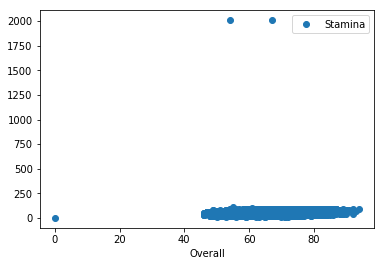

In [71]:
data.plot(x='Overall', y='Stamina', style='o')

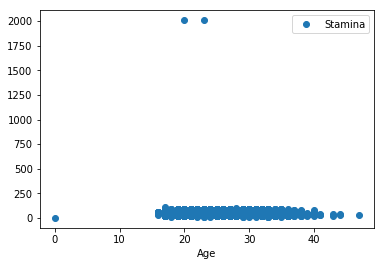

In [72]:
data.plot(x='Age', y='Stamina', style='o')

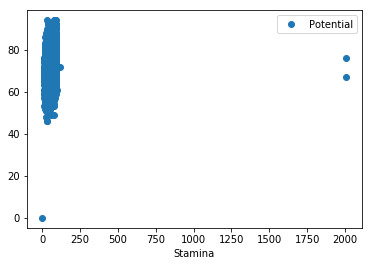

In [75]:
data.plot(x='Stamina', y='Potential', style='o')

In [90]:
def range_age(val):
    return 70 if val < 70 else val
data['puntaje'] = data['Overall'].apply(range_age)
data['puntaje']

0        94
1        93
2        92
3        92
4        92
5        91
6        90
7        90
8        90
9        90
10       90
11       89
12       89
13       89
14       89
15       89
16       89
17       89
18       89
19       88
20       88
21       88
22       88
23       88
24       88
25       88
26       88
27       88
28       88
29       88
         ..
17952    70
17953    70
17954    70
17955    70
17956    70
17957    70
17958    70
17959    70
17960    70
17961    70
17962    70
17963    70
17964    70
17965    70
17966    70
17967    70
17968    70
17969    70
17970    70
17971    70
17972    70
17973    70
17974    70
17975    70
17976    70
17977    70
17978    70
17979    70
17980    70
17981    70
Name: puntaje, Length: 17982, dtype: int64

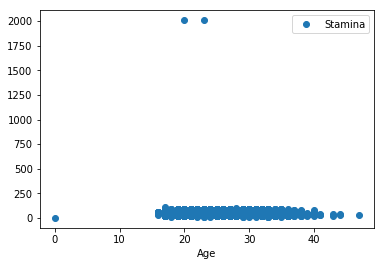

In [91]:
data.plot(x='Age', y='Stamina', style='o')

In [94]:
def range_age(val):
    if val < 47:
        return 2
    elif val < 62:
        return 3
    elif val < 77:
        return 4
    else:
        return 5
data['range-stamina'] = data['Stamina'].apply(range_age)
data.groupby(by=['range-stamina'], as_index=False).agg({'order':'count',
                                                   'Overall':'mean'}).rename(columns= {'order':'FREC',
                                                                                       'Overall': 'RT_CONVERSION'})

,range-stamina,FREC,RT_CONVERSION
0,2,2695,63.934694
1,3,3742,62.099947
2,4,8282,67.128471
3,5,3263,70.660435


In [ ]:

data.groupby(by=['range-stamina'], as_index=False).agg({'order':'count',
                                                   'Overall':'mean'}).rename(columns= {'order':'FREC',
                                                                                       'Overall': 'RT_CONVERSION'})
df.div(df.QT, axis='index')

In [113]:
def regulate(val):
    return  data['promedio_ss'].mean() if val > 100 else val
data['Stamina'] = data['Stamina'].apply(regulate)
max(data['Stamina'])

97.0

In [116]:
data['promedio_ss'] = data[["Stamina", "Strength"]].sum(axis=1) / 2
max(data['promedio_ss'])

92.5

In [119]:
def range_age(val):
    return 1 if val <=29 else 0.75

data['range_age'] = data['Age'].apply(range_age)
max(data['range_age'])

1.0

In [120]:
data['recuperacion'] = data[["promedio_ss", "range_age"]].product(axis=1)
max(data['recuperacion'])

91.0

In [122]:
sorted(list(data['recuperacion']))

[0.0,
 15.5,
 19.0,
 19.875,
 20.25,
 20.25,
 21.0,
 21.0,
 21.375,
 21.375,
 21.75,
 22.5,
 22.5,
 22.5,
 22.5,
 22.5,
 23.0,
 23.0,
 23.25,
 24.0,
 24.0,
 24.0,
 24.375,
 24.375,
 24.5,
 24.75,
 24.75,
 24.75,
 24.75,
 24.75,
 25.0,
 25.0,
 25.125,
 25.125,
 25.125,
 25.125,
 25.125,
 25.125,
 25.5,
 25.875,
 25.875,
 25.875,
 25.875,
 26.0,
 26.25,
 26.25,
 26.25,
 26.25,
 26.25,
 26.25,
 26.5,
 26.625,
 27.0,
 27.0,
 27.0,
 27.0,
 27.0,
 27.0,
 27.0,
 27.0,
 27.0,
 27.0,
 27.375,
 27.375,
 27.375,
 27.5,
 27.5,
 27.5,
 27.5,
 27.5,
 27.75,
 27.75,
 28.0,
 28.0,
 28.0,
 28.125,
 28.125,
 28.125,
 28.125,
 28.125,
 28.5,
 28.5,
 28.5,
 28.5,
 28.875,
 28.875,
 28.875,
 28.875,
 29.0,
 29.0,
 29.0,
 29.0,
 29.0,
 29.0,
 29.25,
 29.25,
 29.25,
 29.25,
 29.25,
 29.25,
 29.5,
 29.5,
 29.5,
 29.5,
 29.5,
 29.5,
 29.5,
 29.5,
 29.625,
 29.625,
 29.625,
 29.625,
 29.625,
 30.0,
 30.0,
 30.0,
 30.0,
 30.0,
 30.0,
 30.0,
 30.0,
 30.0,
 30.0,
 30.0,
 30.0,
 30.0,
 30.0,
 30.0,
 30.0,
 30.0,
 3

In [95]:
data.columns

Index(['Name', 'Age', 'Overall', 'Potential', 'Acceleration', 'Aggression',
       'Agility', 'Balance', 'Ball control', 'Composure', 'Crossing', 'Curve',
       'Dribbling', 'Finishing', 'Free kick accuracy', 'GK diving',
       'GK handling', 'GK kicking', 'GK positioning', 'GK reflexes',
       'Heading accuracy', 'Interceptions', 'Jumping', 'Long passing',
       'Long shots', 'Marking', 'Penalties', 'Positioning', 'Reactions',
       'Short passing', 'Shot power', 'Sliding tackle', 'Sprint speed',
       'Stamina', 'Standing tackle', 'Strength', 'Vision', 'Volleys', 'CAM',
       'CB', 'CDM', 'CF', 'CM', 'LAM', 'LB', 'LCB', 'LCM', 'LDM', 'LF', 'LM',
       'LS', 'LW', 'LWB', 'RAM', 'RB', 'RCB', 'RCM', 'RDM', 'RF', 'RM', 'RS',
       'RW', 'RWB', 'ST', 'order', 'range-age', 'multiplo-age', 'puntaje',
       'range-stamina'],
      dtype='object')

In [123]:
data = data[data.Aggression != 0]

In [124]:
data.describe(include="all")

,Name,Age,Overall,Potential,Acceleration,Aggression,Agility,Balance,Ball control,Composure,...,RWB,ST,order,range-age,multiplo-age,puntaje,range-stamina,promedio_ss,range_age,recuperacion
count,17981,17981.000000,17981.000000,17981.000000,17981.000000,17981.000000,17981.000000,17981.000000,17981.000000,17981.000000,...,17981.000000,17981.000000,17981.000000,17981.000000,17981.000000,17981.000000,17981.000000,17981.000000,17981.000000,17981.000000
unique,16975,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,J. Williams,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,25.144541,66.247984,71.190813,64.607530,55.945554,63.345587,63.818364,58.231133,57.903120,...,51.187921,51.636227,8991.000000,0.733663,0.938004,71.282520,3.673711,64.285862,0.953590,61.238507
std,NaN,4.614272,6.987965,6.102199,14.917186,22.791234,14.794278,14.098144,22.256180,12.934109,...,20.185417,20.345554,5190.811931,0.819042,0.107964,2.810207,0.939394,11.322960,0.097207,12.249119
min,NaN,16.000000,46.000000,46.000000,11.000000,11.000000,14.000000,11.000000,8.000000,5.000000,...,0.000000,0.000000,1.000000,0.000000,0.750000,70.000000,2.000000,15.500000,0.750000,15.500000
25%,NaN,21.000000,62.000000,67.000000,56.000000,43.000000,55.000000,56.000000,53.000000,51.000000,...,48.000000,48.000000,4496.000000,0.000000,1.000000,70.000000,3.000000,57.000000,1.000000,52.875000
50%,NaN,25.000000,66.000000,71.000000,67.000000,59.000000,65.000000,66.000000,63.000000,60.000000,...,56.000000,57.000000,8991.000000,1.000000,1.000000,70.000000,4.000000,66.500000,1.000000,62.500000
75%,NaN,28.000000,71.000000,75.000000,75.000000,69.000000,74.000000,74.000000,69.000000,67.000000,...,64.000000,64.000000,13486.000000,1.000000,1.000000,71.000000,4.000000,72.500000,1.000000,71.000000


In [128]:
for col in data.columns:
    if col != 'Name':
        data[col] = data[col].apply(lambda x: data[col].mean() if x > 100 else x)

In [132]:

max(data['Aggression']), min(data['Aggression'])

(96.0, 11.0)

In [133]:
data.to_csv("datasoccer_new_var.csv", index=False)